# DATASCI W261, Machine Learning at Scale
--------
#### Assignement:  week \#6
#### Shih Yu Chang
### Due: 2016-10-18, 8AM PST

## HW6.0. 

Mathematical optimization is the selection of a best solution with respect to some criteria from some set of available candidates. In general, an optimization problem consists of maximizing or minimizing a real function by systematically choosing input values from an allowed set and finding maximum or minimum value of the function. 

In W207 project, we tried to adjust different input parameters to obtain maximum correction rate in NaiveBaysian estimation problem. 

## HW6.1  Optimization theory: 

For unconstrained optimization of a function $f$, 
the first order necessary condition (FOC) for a point $x=v$ 
to be maximum or minimum, is that the first derivative of $f$
at the point $v$ is equal to zero. 
This condition can be expressed as:

$$\left.\frac{\text{d}f(x)}{\text{d}x}\right|_{x=v}=0$$

The second order optimality conditions (SOC) require that the 
second derivative evaluated at $v$ be positive/negative
for the candidate point $x=v$ to be a minimum/maximum.
A maximum will satisfy:

$$\left.\frac{\text{d}^2f(x)}{\text{d}x^2}\right|_{x=v}<0$$

and a minimum will satisfy

$$\left.\frac{\text{d}^2f(x)}{\text{d}x^2}\right|_{x=v}>0$$

Plot and its code are provided as following:

In [52]:
%load_ext autoreload
%autoreload 2


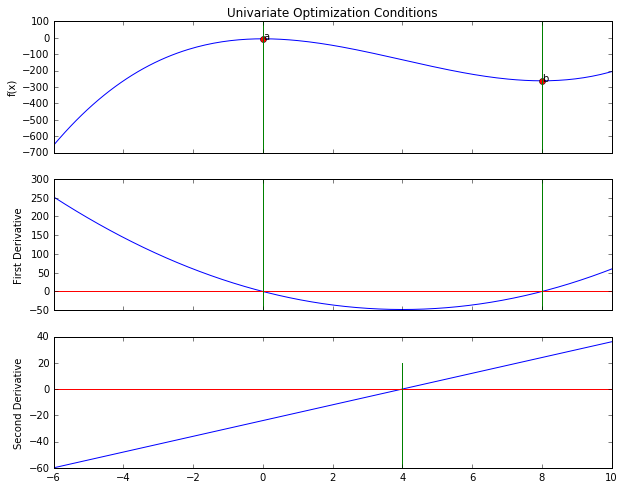

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

n=200
x = np.linspace(-6, 10, n)
y = [pow(i,3)-12*pow(i,2)-6 for i in x]
yd = [3*pow(i,2)-24*i for i in x]
y2d = [6*i-24 for i in x]
# plot
f, axarr = plt.subplots(3, sharex=True)
f.set_size_inches([10,8])
axarr[0].plot(x, y)
axarr[0].plot(0, -6, 'ro')
axarr[0].plot(8, pow(8,3)-12*pow(8,2)-6, 'ro')
axarr[0].set_xlim([-6, 10])
axarr[0].set_ylim([-700, 100])
axarr[0].plot(8*np.ones(n), np.linspace(-700,100,n))
axarr[0].plot(0*np.ones(n), np.linspace(-700,100,n), 'g')
axarr[0].set_title('Univariate Optimization Conditions')
axarr[0].set_ylabel('f(x)')
axarr[0].text(0, -6, 'a')
axarr[0].text(8, pow(8,3)-12*pow(8,2)-6, 'b')

axarr[1].plot(x, yd)
axarr[1].plot(x, np.zeros(n), 'r')
axarr[1].plot(0*np.ones(n), np.linspace(-50,300,n), 'g')
axarr[1].plot(8*np.ones(n), np.linspace(-50,300,n), 'g')
axarr[1].set_ylabel('First Derivative')

axarr[2].plot(x, y2d)
axarr[2].plot(x, np.zeros(n), 'r')
axarr[2].plot(4*np.ones(n), np.linspace(-60,20,n))
axarr[2].set_ylabel('Second Derivative')

plt.show()

#### Discussions
By plotting original $f$ (top plot) and $f'(x)$ (middle plot) derivative
over the range $[-6,10]$, or solving for the FOC:

$$f'(x) = 3x^2 - 24x = 0,$$

we obtain the candidate local maximums and minimums exist at $x=0,8$.
By checking SOC of the second derivative (bottom plot):

$$f''(x) = 6x - 24$$

at $x=0,8$, we are able tell that $x=0$ is the local maximum, 
and $x=8$ is the local minimum.

#### For unconstrained multi-variate optimization, what are the first order Necessary Conditions for Optimality (FOC)? 
For the unconstrained optimization of a multi-varite function f(x), 
the first order necessary condition (FOC) states that the gradient 
at a specific point $x = v$ be the zero vector:

$$\left.\nabla f(x)\right|_{x=v} = \left[\left.\frac{\partial f(x)}{\partial x_1}\right|_{x=v},\cdots,\left.\frac{\partial f(x)}{\partial x_N}\right|_{x=v}\right] = (0,\cdots,0)$$

#### What are the second order optimality conditions (SOC)? Give a mathematical defintion. What is the Hessian matrix in this context?
For the second order optimality conditions, we must introduce the Hessian matrix
of second partial derivatives:

$$
H_f =
\large
\left[
\begin{array}{ccc}
    \frac{\partial^2 f(x)}{\partial x_1^2} & \cdots & \frac{\partial^2 f(x)}{\partial x_1\partial x_N} \\
    \vdots & \ddots & \vdots \\
    \frac{\partial^2 f(x)}{\partial x_N\partial x_1} & \cdots & \frac{\partial^2 f(x)}{\partial x_N^2}
\end{array}
\right]
$$

The SOC states that if evaluation at the point $x=v$ renders $H_f$
negative/positive definite, i.e., all eigenvalues of $H_f$ 
are negative/positive, then the candidate point $x=v$ is a local maximum/minimum.

## HW6.2


The update rule for finding $x_{n+1}$ by the Newton-Raphonson method is
given by the evaluation of $f(x)$ at the zero of the line tangent to 
$f$ at $x_{n}$:

$$x_{n+1} = x_{n} - \frac{f(x_{n})}{f'(x_{n})}$$

So, with expressions for $f$ and $f'$, we have

$$x_{n+1} = x_{n} - \frac{x_{n}^3+2x_{n}-4}{3x_{n}^2+2}$$

into which we can substitute $x_{n} = 1$ to find:

$$
x_{2} 
= 
x_{1} - \frac{x_{1}^3+2x_{1}-4}{3x_{1}^2+2}
=
1 - \frac{1^3+2\cdot1-4}{3\cdot1^2+2}
=
1.2
$$

## HW6.3 Convex optimization

#### What makes an optimization problem convex?
An optimization problem is convex if it is posed for 
a convex objection function over a convex set.

A set $X$ in Euclidean space is convex if for every pair of points,
$x_1,x_2\in X$, every other point, $x_3$, along the straight line
segment connecting $x_1$ and $x_2$ lies in $X$. A function $f(x)$ is convex over $X$ if for all
$x_1,x_2\in X$ and for all $t\in[0,1]$:

$$
f(tx_1-(1-t)x_2)\leq tf(x_1)-(1-t)f(x_2)
$$

Intuitively, a convex function lies below its chords.

#### What are the first order Necessary Conditions for Optimality in convex optimization?
The first order necessary condition for optimality in convex optimization
states that for $x=v$ to be an extremum, the gradient evaluated at $c$ must
be equal to the zero vector:

$$\nabla f(v)=(0,\cdots,0)$$

#### What are the second order optimality conditions for convex optimization?
If the problem is convex, then the Hessian is gauranteed to be positive semi-definite,
and a local minimum is a global minimum.

#### Are both necessary to determine the maximum or minimum of candidate optimal solutions?
The first order optimality condition is both necessary and sufficient
for convex optimization. If the objective function is concave, i.e., 

$$
f(tx_1-(1-t)x_2)\geq tf(x_1)-(1-t)f(x_2)
$$

then an extremum is a global maximum, 
and if the objective function is convex,
then an extremum will be a global minimum.

## HW 6.4

1. cost function $J(W)=\frac{1}{2}\sum_i{weight_i(WX_i-y_i)^2}$
2. let's assume $i$ is the index for training sample, and $j$ is the index for regression coefficients $w_j$
3. the gradient function $\nabla J(W)$ is a vector of $\frac{\partial J(w_j)}{\partial w_j}$, where:

$$\frac{\partial J(w_j)}{\partial w_j}=\frac{\partial}{\partial w_j}\frac{1}{2}\sum_i{weight_i(WX_i-y_i)^2} = \frac{1}{2}\sum_i{weight_i\times\frac{\partial}{\partial w_j}(WX_i-y_i)^2}$$

$$= \frac{1}{2}\sum_i{weight_i\times 2(WX_i-y_i)\frac{\partial}{\partial w_j}(WX_i)} = \sum_i{weight_i (WX_i-y_i)X_{ij}}$$

Finally, we have $${\nabla J(W) = \sum_i{weight_i (WX_i-y_i)X_i}}$$

## HW 6.5

In [9]:
# generate 10^6 data points and save to disk
import numpy as np
size = 1000000
x = np.random.uniform(-4, 4, size)
y = x * 1.0 - 4 + np.random.normal(0,0.5,size)
data = zip(y,x)
np.savetxt('LinearRegression.csv',data,delimiter = ",")

In [10]:
%%writefile MrJobBatchGDUpdate_LinearRegression.py
from mrjob.job import MRJob, MRStep
    
class MrJobBatchGDUpdate_LinearRegression(MRJob):
    # run before the mapper processes any input
    def read_weightsfile(self):
        # Read weights file
        with open('weights.txt', 'r') as f:
            self.weights = [float(v) for v in f.readline().split(',')]
        # Initialze gradient for this iteration
        self.partial_Gradient = [0]*len(self.weights)
        self.partial_count = 0
    
    # Calculate partial gradient for each example 
    def partial_gradient(self, _, line):
        D = (map(float,line.split(',')))
        # y_hat is the predicted value given current weights
        y_hat = self.weights[0]+self.weights[1]*D[1]
        # Update partial gradient vector with gradient form current example
        self.partial_Gradient =  [self.partial_Gradient[0] + D[0]-y_hat,
                                  self.partial_Gradient[1]+ (D[0]-y_hat) *D[1]]
        self.partial_count = self.partial_count + 1
        #yield None, (D[0]-y_hat,(D[0]-y_hat)*D[1],1)
    
    # Finally emit in-memory partial gradient and partial count
    def partial_gradient_emit(self):
        yield None, (self.partial_Gradient,self.partial_count)
        
    # Accumulate partial gradient from mapper and emit total gradient 
    # Output: key = None, Value = gradient vector
    def gradient_accumulater(self, _, partial_Gradient_Record): 
        total_gradient = [0]*2
        total_count = 0
        for partial_Gradient,partial_count in partial_Gradient_Record:
            total_count = total_count + partial_count
            total_gradient[0] = total_gradient[0] + partial_Gradient[0]
            total_gradient[1] = total_gradient[1] + partial_Gradient[1]
        yield None, [v/total_count for v in total_gradient]
    
    def steps(self):
        return [MRStep(mapper_init=self.read_weightsfile,
                       mapper=self.partial_gradient,
                       mapper_final=self.partial_gradient_emit,
                       reducer=self.gradient_accumulater)] 
    
if __name__ == '__main__':
    MrJobBatchGDUpdate_LinearRegression.run()

Writing MrJobBatchGDUpdate_LinearRegression.py


In [11]:
from numpy import random,array
from MrJobBatchGDUpdate_LinearRegression import MrJobBatchGDUpdate_LinearRegression

learning_rate = 0.05
stop_criteria = 0.000005

# Generate random values as inital weights
weights = array([random.uniform(-3,3),random.uniform(-3,3)])
# Write the weights to the files
with open('weights.txt', 'w+') as f:
    f.writelines(','.join(str(j) for j in weights))

# create a mrjob instance for batch gradient descent update over all data
mr_job = MrJobBatchGDUpdate_LinearRegression(args=['LinearRegression.csv',
                                                   '--file', 'weights.txt',
                                                   '--strict-protocols'])
# Update centroids iteratively
i = 0
while(1):
    print 'iteration: {0:4d} weights: {1:3.9f} {2:3.9f}'.format(i, weights[0], weights[1])
    # Save weights from previous iteration
    weights_old = weights
    with mr_job.make_runner() as runner: 
        runner.run()
        # stream_output: get access of the output 
        for line in runner.stream_output():
            # value is the gradient value
            key,value =  mr_job.parse_output_line(line)
            # Update weights
            weights = weights + learning_rate*array(value)
    i = i + 1
    # Write the updated weights to file 
    with open('weights.txt', 'w+') as f:
        f.writelines(','.join(str(j) for j in weights))
    # Stop if weights get converged
    if(sum((weights_old-weights)**2)<stop_criteria):
        break
        
print 'Final weights: {0:3.9f} {1:3.9f}'.format(weights[0], weights[1])

iteration:    0 weights: -1.3786386929 -2.8695571806
iteration:    1 weights: -1.5098207277 -1.8370925893
iteration:    2 weights: -1.6344063174 -1.0800795571
iteration:    3 weights: -1.7527352472 -0.5250313016
iteration:    4 weights: -1.8651276550 -0.1180662770
iteration:    5 weights: -1.9718857229 0.1803222234
iteration:    6 weights: -2.0732950949 0.3991010700
iteration:    7 weights: -2.1696260853 0.5595091757
iteration:    8 weights: -2.2611347244 0.6771192043
iteration:    9 weights: -2.3480636776 0.7633492465
iteration:   10 weights: -2.4306430644 0.8265712002
iteration:   11 weights: -2.5090911951 0.8729234524
iteration:   12 weights: -2.5836152428 0.9069067480
iteration:   13 weights: -2.6544118590 0.9318210899
iteration:   14 weights: -2.7216677432 0.9500860805
iteration:   15 weights: -2.7855601726 0.9634757997
iteration:   16 weights: -2.8462574962 0.9732910220
iteration:   17 weights: -2.9039195987 0.9804854878
iteration:   18 weights: -2.9586983358 0.9857584872
iterati

In [27]:
from numpy.polynomial.polynomial import polyfit
from numpy.random import choice

size = 1000000
x = np.random.uniform(-4, 4, size)
y = x * 1.0 - 4 + np.random.normal(0,0.5,size)


j = choice(range(len(x)), 0.01*len(x))
## OLS
weights = float(1)/(x*0 + 1)
result1 = polyfit(x[j], y[j], 1, w=weights[j])
print "The intercept, slope from applying OLS without weights:"
print result1[0],result1[1]
print "="*100
## WOLS with w = 1/abs(x)
weights = float(1)/(abs(x))
result2 = polyfit(x[j], y[j], 1, w=weights[j])
print "The intercept, slope from applying weighted OLS as 1/abs(x):"
print result2[0],result2[1]



The intercept, slope from applying OLS without weights:
-3.99468225057 1.00104174181
The intercept, slope from applying weighted OLS as 1/abs(x):
-4.18999737701 1.050134644


/home/cloudera/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


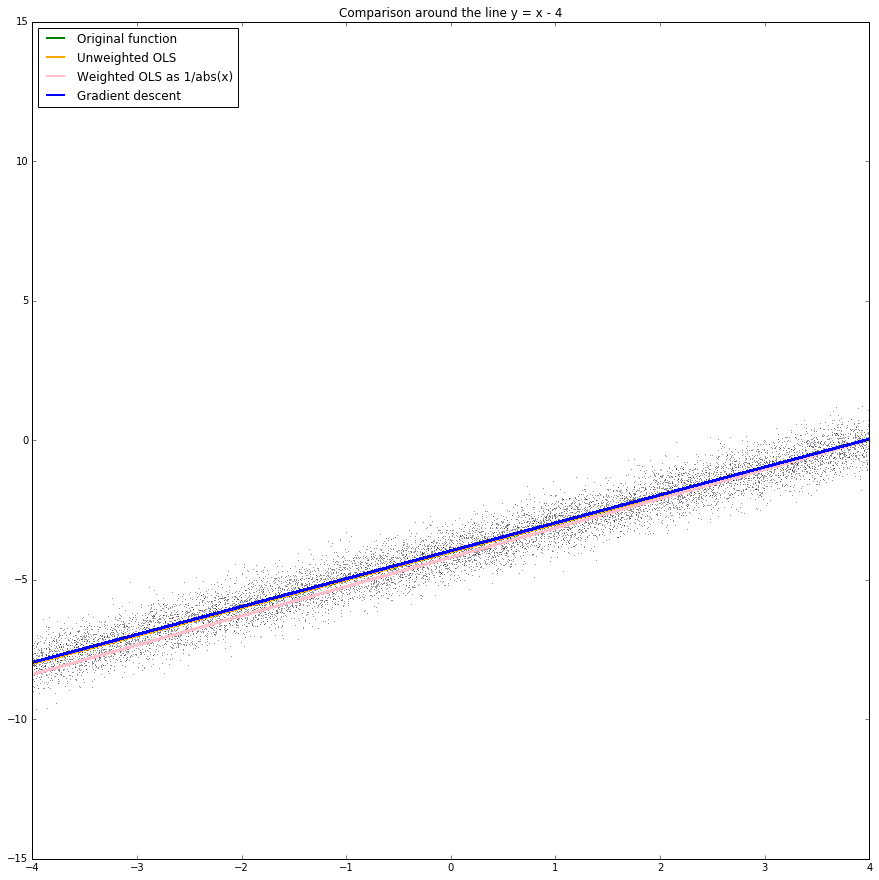

In [31]:
fig = py.figure(figsize = (15,15))
py.ylim(-15, 15)

py.plot(x[idx], y[idx],'o',ms=0.25)
py.plot(
    x[idx],x[idx]-4,
    color='green',linestyle='solid', label="Original function",lw = 2)

py.plot(
    x[idx],result1[1]*x[idx]+result1[0],lw = 2,
    color='orange',linestyle='solid',label="Unweighted OLS")

py.plot(
    x[idx],result2[1]*x[idx]+result2[0],lw = 2,
    color='pink',linestyle='solid',label="Weighted OLS as 1/abs(x)")
 
py.plot(
    x[idx],1.0001087412*x[idx]-3.9583702910 ,lw = 2,
    color='blue',linestyle='solid', label="Gradient descent")

py.title('Comparison around the line y = x - 4')
py.legend(loc=2)
py.show()

#### Discussion
From figure, OLS provides a result (orange) that is far from the truth (green), 
and further, even WLOS with $w(x)=\frac{1}{|\:x\:|}$ (pink) does not do
good enough to fit desired results. 

## HW6.6 Clean up notebook for GMM via EM

In [85]:
%matplotlib inline
from numpy import random, append
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
import json

# generate 3 clusters the size of 1000 points each 
size1 = size2 = size3 = 1000

# cluster 1 is centered about (4,0)
samples1 = random.multivariate_normal([4, 0], [[1, 0],[0, 1]], size1)
data = samples1

# cluster 2 is centered about (6,6)
samples2 = random.multivariate_normal([6, 6], [[1, 0],[0, 1]], size2)
data = append(data,samples2, axis=0)

# cluster 3 is centered about (0,4)
samples3 = random.multivariate_normal([0, 4], [[1, 0],[0, 1]], size3)
data = append(data,samples3, axis=0)

# we've appended all the generated data for the three clusters into a single list
# now randomize the list - shaken, not stirred. Save the result to a JSON file.
data = data[random.permutation(size1+size2+size3),]
with open("data.txt", "w") as f:
    for row in data.tolist():
        json.dump(row, f)
        f.write("\n")

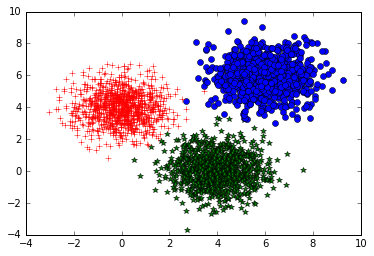

In [86]:
plt.plot(samples1[:, 0], samples1[:, 1],'*', color = 'green')
plt.plot(samples2[:, 0], samples2[:, 1],'o',color = 'blue')
plt.plot(samples3[:, 0], samples3[:, 1],'+',color = 'red')
plt.show()

In [60]:
%%writefile mr_GMixEmInitialize.py
from mrjob.job import MRJob, MRStep

from numpy import mat, zeros, shape, random, array, zeros_like, dot, linalg
from numpy import mean as npmean
from random import sample
import json
from math import pi, sqrt, exp, pow


class MrGMixEmInit(MRJob):
    DEFAULT_PROTOCOL = 'json'
    
    def __init__(self, *args, **kwargs):
        super(MrGMixEmInit, self).__init__(*args, **kwargs)
         # number of mappers
        self.numMappers = 1    
         # count number of points to be classified
        self.count = 0
        
        
        # Configuations for input arguments                                                 
    def configure_options(self):
        super(MrGMixEmInit, self).configure_options()
        self.add_passthrough_option(
            '--k', dest='k', default=3, type='int',
            help='k: number of densities in mixture')
        self.add_passthrough_option(
            '--pathName', dest='pathName', default="", type='str',
            help='pathName: pathname where intermediateResults6_6.txt is stored')
    
    # each line is a data point of the cluster x_j
    # take the first 2*k lines and emit them then ignore the rest
    def mapper(self, key, xjIn):
        #something simple to grab random starting point
        #collect the first 2*k
        if self.count <= 2*self.options.k:
            self.count += 1
            yield (1,xjIn)        
    
    # every key is the same = 1, so we should have 2*k items show up at the reducer
    # all we want is to accumulate the points into a list from which we will draw k points randomly
    # Using update formula to get next iteration inputs for mean, covaraince and prior probabilities
    def reducer(self, key, xjIn):        
        #accumulate data points mapped to 0 from 1st mapper and pull out k of them as starting point
        initial_point_set = []
        for xj in xjIn:
            x = json.loads(xj)
            initial_point_set.append(x)
            yield 1, xj
        
        # take k random samples
        centroids = [ initial_point_set[i] for i in sample(xrange(len(initial_point_set)), self.options.k) ]
            
        # use the covariance of the selected centers as the starting guess for covariances
        # first, calculate mean of centers, the mu vector.
        mean = npmean(centroids, axis=0)
        
        # then accumulate the deviations along the diagonal of a square matrix 
        # this is the initialization of the Sigma matrix
        cov = zeros((len(mean),len(mean)),dtype=float)
        for x in centroids:
            xmm = array(x) - mean
            for i in range(len(mean)):
                cov[i,i] = cov[i,i] + xmm[i]*xmm[i]
        
        # This implements the covariance matrix
        cov = cov/(float(self.options.k))
        covInv = linalg.inv(cov)
        
        cov_1 = [covInv.tolist()]*self.options.k
        
        # dump our initialization results to a file for debug inspection
        jDebug = json.dumps([centroids,mean.tolist(),cov.tolist(),covInv.tolist(),cov_1]) 
        with open(self.options.pathName + "debug6_6.txt", 'w') as debugfile:
            debugfile.write(jDebug)
        

        #initialize prior probabilities all with the same number - 1/k - equally probably for each cluster
        
        pi = zeros(self.options.k,dtype=float)
        
        for i in range(self.options.k):
            pi[i] = 1.0/float(self.options.k)
        
        #form output object
        outputList = [pi.tolist(), centroids, cov_1]
            
        jsonOut  = json.dumps(outputList)
        
        #write new parameters to file
        fullPath = self.options.pathName + 'intermediateResults6_6.txt'
        fileOut = open(fullPath,'w')
        fileOut.write(jsonOut)
        fileOut.close()

def steps(self):
    return [MRStep(mapper=self.mapper,
                   reducer=self.reducer)]
        
if __name__ == '__main__':
    MrGMixEmInit.run()

Overwriting mr_GMixEmInitialize.py


In [61]:
%%writefile mr_GMixEmIterate.py
from mrjob.job import MRJob

from math import sqrt, exp, pow,pi
from numpy import zeros, shape, random, array, zeros_like, dot, linalg
import json

# compute the guassian probability for a point x
def gauss(x, mu, P_1):
    xtemp = x - mu
    n = len(x)
    p = exp(- 0.5*dot(xtemp,dot(P_1,xtemp)))
    detP = 1/linalg.det(P_1)
    p = p/(pow(2.0*pi,n/2.0)*sqrt(detP))
    return p

class MrGMixEm(MRJob):
    DEFAULT_PROTOCOL = 'json'
    
    def __init__(self, *args, **kwargs):
        super(MrGMixEm, self).__init__(*args, **kwargs)
        
        with open(self.options.pathName + 'intermediateResults6_6.txt', 'r') as fileIn:
            inputJson = fileIn.read()

        inputList = json.loads(inputJson)
        self.phi =   inputList[0]  # prior class probabilities 
        self.means = inputList[1]  # means 
        self.cov_1 = inputList[2]  # inverse covariance matrices
                            
        #sum of weights - by cluster
        self.new_phi = zeros_like(self.phi)        #partial weighted sum of weights
        self.new_means = zeros_like(self.means)
        self.new_cov = zeros_like(self.cov_1)
        #number of mappers
        self.numMappers = 1    
        #counts for points 
        self.count = 0                 
        
                                                 
    def configure_options(self):
        super(MrGMixEm, self).configure_options()

        self.add_passthrough_option(
            '--k', dest='k', default=3, type='int',
            help='k: number of densities in mixture')
        self.add_passthrough_option(
            '--pathName', dest='pathName', default="", type='str',
            help='pathName: pathname where intermediateResults6_6.txt is stored')
    
    # each item is a point in the set of data points
    def mapper(self, _, val):
        #accumulate partial sums for each mapper
        xList = json.loads(val)
        x = array(xList)
        wtVect = zeros_like(self.phi)
        
        # for each cluster compute the weights from the guassian probabilities for this point
        
        for i in range(self.options.k):
            wtVect[i] = self.phi[i]*gauss(x,self.means[i],self.cov_1[i])
        wtSum = sum(wtVect)
        wtVect = wtVect/wtSum
        #accumulate to update probability densities.
        #increment count
        self.count += 1
        #accumulate weights for phi update
        self.new_phi = self.new_phi + wtVect
        for i in range(self.options.k):
            #accumulate weighted x's for mean update
            self.new_means[i] = self.new_means[i] + wtVect[i]*x
            #accumulate weighted squares for covariance matrix update
            xmm = x - self.means[i]
            covInc = zeros_like(self.new_cov[i])
            
            for l in range(len(xmm)):
                for m in range(len(xmm)):
                    covInc[l][m] = xmm[l]*xmm[m]
            self.new_cov[i] = self.new_cov[i] + wtVect[i]*covInc     
       

        #mapper output for reducer
    def mapper_final(self):
        
        out = [self.count, (self.new_phi).tolist(), (self.new_means).tolist(), (self.new_cov).tolist()]
        jOut = json.dumps(out)        
        
        yield 1,jOut
    
    
    def reducer(self, key, xs):
        #accumulate partial sums
        first = True        
        #accumulate partial sums
        #xs us a list of paritial stats, including count, phi, mean, and covariance. 
        #Each stats is k-length array, storing info for k components
        for val in xs:
            if first:
                temp = json.loads(val)
                #totCount, totPhi, totMeans, and totCov are all arrays
                totCount = temp[0]
                totPhi = array(temp[1])
                totMeans = array(temp[2])
                totCov = array(temp[3])                
                first = False
            else:
                temp = json.loads(val)
                #cumulative sum of four arrays
                totCount = totCount + temp[0]
                totPhi = totPhi + array(temp[1])
                totMeans = totMeans + array(temp[2])
                totCov = totCov + array(temp[3])
        #update new results of mean, prior probabilties and covariance matrix
        newPhi = totPhi/totCount
        newMeans = totMeans
        newCov_1 = totCov
        for i in range(self.options.k):
            newMeans[i,:] = totMeans[i,:]/totPhi[i]
            tempCov = totCov[i,:,:]/totPhi[i]
            newCov_1[i,:,:] = linalg.inv(tempCov)
        
        outputList = [newPhi.tolist(), newMeans.tolist(), newCov_1.tolist()]
        jsonOut = json.dumps(outputList)
        
        #write new parameters to file for next iteration
        with open(self.options.pathName + 'intermediateResults6_6.txt','w') as fileOut:
            fileOut.write(jsonOut)

if __name__ == '__main__':
    MrGMixEm.run()

Overwriting mr_GMixEmIterate.py


Iteration0
[[0.4215174878763189, 2.5470954104864028], [4.092027409363962, -0.987450942524898], [3.274732461727994, 1.4880160612096394]]


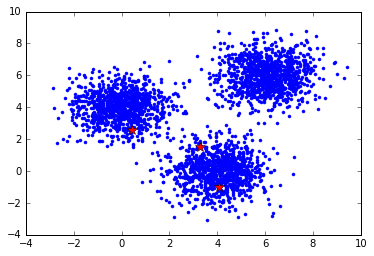

Iteration1
[[0.4265298764333884, 4.144562372665774], [4.15407439278856, -0.33640957273944594], [5.223357817174173, 4.256007778028231]]


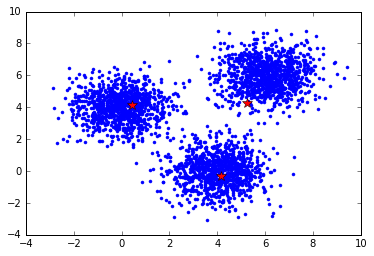

Iteration2
[[0.15726658982768854, 4.05063663246113], [4.201272095982394, -0.2188696759922371], [5.481584053716516, 4.694947104388337]]


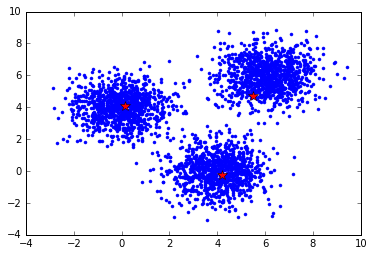

Iteration3
[[-0.007466265078787711, 4.030775196657829], [4.120848349928355, -0.21722331638152365], [5.62445009213656, 5.045152396672466]]


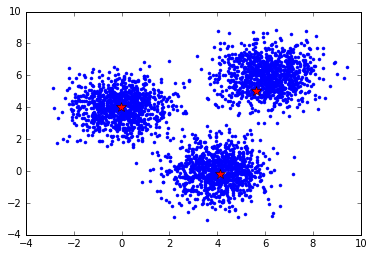

Iteration4
[[-0.034239990711900724, 4.028564444520182], [4.045965097701723, -0.19364744821239888], [5.760022115467449, 5.364991765198603]]


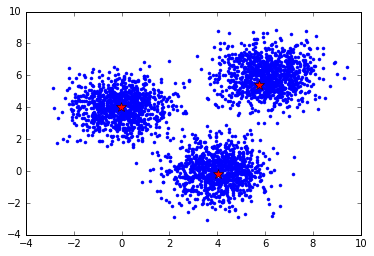

Iteration5
[[-0.036989494390825835, 4.027548637023214], [4.006973183419705, -0.14375555075030622], [5.896946345231238, 5.668024846277494]]


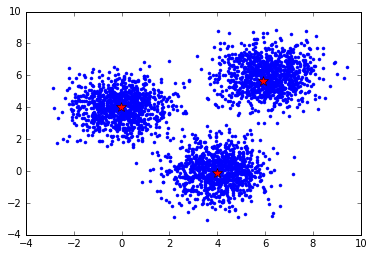

Iteration6
[[-0.032421315623643594, 4.026596950067446], [4.003536961220577, -0.07640717624908533], [5.994329091116215, 5.879411481145869]]


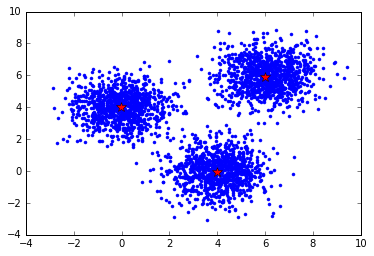

Iteration7
[[-0.027767678783508068, 4.02743166815507], [4.008913376770582, -0.033098512828761764], [6.037186572895023, 5.966397381163812]]


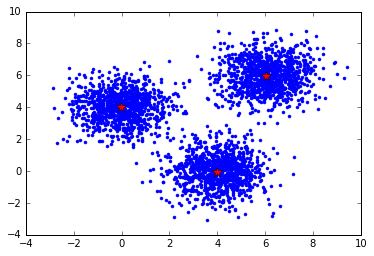

Iteration8
[[-0.026076674674110362, 4.028698794764392], [4.011046876507247, -0.02098758707277707], [6.046738376390517, 5.9836757592694045]]


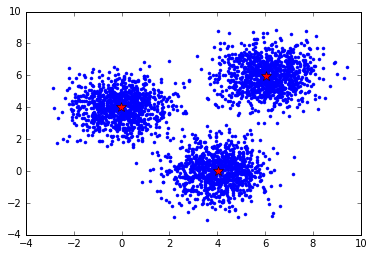

Iteration9
[[-0.02574514971370519, 4.029184155503179], [4.0112856303580715, -0.01916867371085606], [6.04810302477395, 5.985665360917888]]


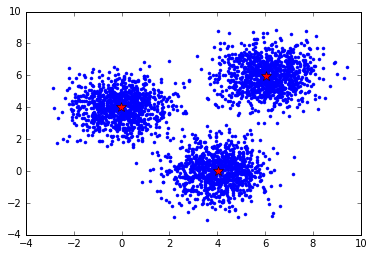

In [62]:
from mr_GMixEmInitialize import MrGMixEmInit
from mr_GMixEmIterate import MrGMixEm
import json
from math import sqrt
import matplotlib.pyplot as plt


# Plot each iteration output 
def plot_iteration(means):
    plt.plot(samples1[:, 0], samples1[:, 1], '.', color = 'blue')
    plt.plot(samples2[:, 0], samples2[:, 1], '.', color = 'blue')
    plt.plot(samples3[:, 0], samples3[:, 1],'.', color = 'blue')
    plt.plot(means[0][0], means[0][1],'*',markersize =10,color = 'red')
    plt.plot(means[1][0], means[1][1],'*',markersize =10,color = 'red')
    plt.plot(means[2][0], means[2][1],'*',markersize =10,color = 'red')
    plt.show()

def dist(x,y):
    #euclidean distance between two lists    
    sum = 0.0
    for i in range(len(x)):
        temp = x[i] - y[i]
        sum += temp * temp
    return sqrt(sum)

# first run the initializer to get starting centroids 
filePath = 'data.txt'
mrJob = MrGMixEmInit(args=[filePath,
                           '--k','3',
                           '--pathName','/home/cloudera/',
                           '--strict-protocols'])

# after running this MRJob we will have an initialized  mean, prior probabilties and covariance matrix

with mrJob.make_runner() as runner:
    runner.run()

# pull out the centroid values to begin iterate after one iteration
emPath = "/home/cloudera/intermediateResults6_6.txt"
with open(emPath, "r") as fileIn:
    paramJson = fileIn.read()    

delta = 10
iter_num = 0
#Begin iteration on change in centroids
while delta > 0.02:
    print "Iteration" + str(iter_num)
    iter_num = iter_num + 1
    # parse old centroid values
    oldParam = json.loads(paramJson)
    # run one iteration
    oldMeans = oldParam[1]
    mrJob2 = MrGMixEm(args=[filePath,
                           '--k','3',
                           '--pathName','/home/cloudera/',
                           '--strict-protocols'])
    with mrJob2.make_runner() as runner:
        runner.run()

    #compare new centroids to old ones
    with open(emPath, 'r') as fileIn:
        paramJson = fileIn.read()
        
    newParam = json.loads(paramJson)

    k_means = len(newParam[1])
    newMeans = newParam[1]

    delta = 0.0
    for i in range(k_means):
        delta += dist(newMeans[i],oldMeans[i])

    print oldMeans
    plot_iteration(oldMeans)
print "Iteration" + str(iter_num)
print newMeans
plot_iteration(newMeans)

## HW6.7  Implement Bernoulli Mixture Model via EM

In [5]:
import json

#Unit test data into the correct format
data = {1: 'hot chocolate cocoa beans',
        2: 'cocoa ghana africa',
        3: 'beans harvest ghana',
        4: 'cocoa butter',
        5: 'butter truffles',
        6: 'sweet chocolate',
        7: 'sweet sugar',
        8: 'sugar cane brazil',
        9: 'sweet sugar beet',
        10: 'sweet cake icing',
        11: 'cake black forest'}

# Collect the vocabulary of these documents
vocab = set()
for doc in data:
    words = data[doc].split()
    for word in words:
        vocab.add(word)
vocabList = list(vocab)

# Binarize the data according to our vocabulary
binaryData = []

for doc in data:
    binarized = [0.0]*len(vocabList)
    words = data[doc].split()
    for word in words:
        binarized[vocabList.index(word)] = 1.0
    binaryData.append(binarized)

with open('BMM_unit_data.txt', 'w') as f:
    for row in binaryData:
        json.dump(row, f)
        f.write('\n')

In [14]:
%%writefile MR_BMM_EM_Initialize.py
from mrjob.job import MRJob
import numpy as np
from random import sample
import json

class BMM_EM_Initialize(MRJob):
    

    # Set default protocol
    DEFAULT_PROTOCOL='json'
    
    # Define initializer
    def __init__(self, *args, **kwargs):
        super(BMM_EM_Initialize, self).__init__(*args, **kwargs)
        
        # Set number of mappers
        self.numMappers = 1
        
        # Initialize count
        self.count = 0
        
    # Configure job options
    def configure_options(self):
        super(BMM_EM_Initialize, self).configure_options()
        self.add_passthrough_option('--k', dest='k', default=4, type='int', 
                                    help='k: number of densities in mixture')
        self.add_passthrough_option('--pathName', dest='pathName', default='', type='str',
                                    help='pathName: path name where intermediateResults.txt is stored')

    def mapper(self, _, line):
        # We are going to just output 2 * k points
        if self.count < 2 * self.options.k:
            self.count += 1
            yield (1, line)
            

    def reducer(self, key, values):
        
       
        # Initialize centroids

        
        k = self.options.k
        Centroids = []
        
        # Append each point from the mapper to centroids

        for val in values:
            Centroids.append(json.loads(val))
            yield 1, val
            
        # Sample k points 

        sampleIndex = sample(range(len(Centroids)), k)

        centroids = []
        for i in sampleIndex:
            centroids.append(Centroids[i])
        

        # Use 1/k as the starting guess for the phis

        
        phi = np.zeros(k, dtype=float)
        
        for i in range(k):
            phi[i] = 1.0/float(k)
            
            

        # Output initializations

        
        outputList = [phi.tolist(), centroids]
        jsonOut = json.dumps(outputList)
        
        # Write to file
        fullPath = self.options.pathName + 'intermediateResults6_7.txt'
        with open(fullPath, 'w') as outfile:
            outfile.write(jsonOut)
            
        
if __name__ == '__main__':
    BMM_EM_Initialize.run()

Overwriting MR_BMM_EM_Initialize.py


In [15]:
%%writefile MR_BMM_EM_Iterate.py
from mrjob.job import MRJob
import numpy as np
import json
from math import pi, sqrt, exp, pow, log
from decimal import *

# Calculating Bernoulli distribution, expressed by log 

def BernouProb(x, mu):
    # Use logs here!
    n = len(x)
    logProb = 0
    for i in range(n):
        if mu[i] ** x[i] * (1 - mu[i]) ** (1 - x[i]) == 0:
            logProb = float('-inf')
            break
        elif mu[i] ** x[i] * (1 - mu[i]) ** (1 - x[i]) == 1:
            logProb += 0.0
        else:
            logProb += x[i] * log(mu[i]) + (1 - x[i]) * log(1 - mu[i])
    return logProb

class BMM_EM_Iterate(MRJob):
    

    DEFAULT_PROTOCOL='json'
    

    def __init__(self, *args, **kwargs):
        super(BMM_EM_Iterate, self).__init__(*args, **kwargs)
        
        # Read input from JSON
        fullPath = self.options.pathName + 'intermediateResults6_7.txt'
        with open(fullPath,'r') as infile:
            inputJSON = infile.read()
        inputList = json.loads(inputJSON)
        
        # Initialize prior probabilities (phi), centroids 
        self.phi = np.array(inputList[0])
        self.centroids = np.array(inputList[1])
        
        # Initialize partial sums
        self.new_phi = np.zeros_like(self.phi)
        self.new_centroids = np.zeros_like(self.centroids)
        
        # Set number of mappers
        self.numMappers = 1
        
        # Initialize count
        self.count = 0
        
    # Configure job options
    def configure_options(self):
        super(BMM_EM_Iterate, self).configure_options()
        self.add_passthrough_option('--k', dest='k', default=3, type='int', 
                                    help='k: number of densities in mixture')
        self.add_passthrough_option('--pathName', dest='pathName', default='', type='str',
                                    help='pathName: path name where intermediateResults6_7.txt is stored')
        

    def mapper(self, _, line):
        
        k = self.options.k
        

        # Expectation step by calculating class probability for each data point

        
        x = np.array(json.loads(line))
        weightVector = np.zeros_like(self.phi)
        for i in range(k):
            weightVector[i] = Decimal(log(self.phi[i]) + BernouProb(x, self.centroids[i])).exp()
        
        if sum(weightVector) == 0:
            weightVector += .0001
        weightVector /= sum(weightVector)
        
       
        # Partial sums for mu, prior probabilities 
        
        self.count += 1
        
        # Equation (4)
        self.new_phi += weightVector
        
        # Equation (2): partial sum for weighted xs
        for i in range(k):
            self.new_centroids[i] += weightVector[i] * x

    def mapper_final(self):
        out = [self.count, (self.new_phi).tolist(), (self.new_centroids).tolist()]
        jOut = json.dumps(out)
        yield 1, jOut
    
 
    # accumulate partial sums of count, prior probabilties, centroids 
   
    def reducer(self, key, values):
        k = self.options.k
        first = True
        
        for val in values:
            
            # If this is the first record, initialize sums
            if first:
                fields = json.loads(val)
                
                totCount = fields[0]
                totPhi = np.array(fields[1])
                totCentroids = np.array(fields[2])
                first = False
            
            # If this isn't the first, accumulate
            else:
                fields = json.loads(val)
                
                totCount += fields[0]
                totPhi += np.array(fields[1])
                totCentroids += np.array(fields[2])
        
        
     
        finalPhi = totPhi / totCount
        
      
        finalCentroids = np.array(totCentroids)
   

        for i in range(k):
            finalCentroids[i, :] = totCentroids[i, :] / totPhi[i]
            
        # Create output
        outputList = [finalPhi.tolist(), finalCentroids.tolist()]
        jsonOut = json.dumps(outputList)
                
        # Write to file
        fullPath = self.options.pathName + 'intermediateResults6_7.txt'
        with open(fullPath, 'w') as outfile:
            outfile.write(jsonOut)
            
    
if __name__ == '__main__':
    BMM_EM_Iterate.run()

Overwriting MR_BMM_EM_Iterate.py


### Driver

In [16]:
from MR_BMM_EM_Initialize import BMM_EM_Initialize
from MR_BMM_EM_Iterate import BMM_EM_Iterate

import json
from math import sqrt

# Helper to calculate Euclidean distance
def dist(x, y):
    sum = 0.0
    for i in range(len(x)):
        sum += (x[i] - y[i]) ** 2
    return sqrt(sum)

def run_bmm(filePath, k):
    # Run the initializer to get the starting centroids
    myPathName = '/home/cloudera/'
    mrJobInit = BMM_EM_Initialize(args=[filePath, '--pathName', myPathName, '--k=' + str(k), '--no-strict-protocol'])

    with mrJobInit.make_runner() as runner:
        runner.run()

    # Read the initialized values for first comparison
    intermediatePath = 'intermediateResults6_7.txt'
    with open(intermediatePath, 'r') as f:
        paramJSON = f.read()

    # Initialize delta and iteration
    delta = 10
    iteration = 0
    TotalIterations = []

    # For unit test
    testWords = ['africa', 'brazil', 'cocoa', 'sugar', 'sweet']

    oldParam = json.loads(paramJSON)
    oldCentroids = oldParam[1]

    TotalIterations.append(oldParam)

    while delta > 0.02:
        iteration += 1

        # Parse old centroid values
        oldParam = json.loads(paramJSON)
        oldCentroids = oldParam[1]

        # Run one iteration of algorithm
        mrJobIterate = BMM_EM_Iterate(args=[filePath, '--pathName', myPathName, '--k=' + str(k), '--no-strict-protocol'])
        with mrJobIterate.make_runner() as runner:
            runner.run()

        # Compare new centroids to old centroids
        with open(intermediatePath,'r') as infile:
            paramJSON = infile.read()

        newParam = json.loads(paramJSON)

        k = len(newParam[1])
        newCentroids = newParam[1]
        newWeights = newParam[0]

        delta = 0.0
        for i in range(k):
            delta += dist(newCentroids[i], oldCentroids[i])

        TotalIterations.append(newParam)
    return TotalIterations

### Results of unit test

In [20]:
TotalIterations = run_bmm('BMM_unit_data.txt', 2)
lastResult = TotalIterations[-1]

# Final output
print 'After convergence:'
print '='*20
print '\nIterations:', len(TotalIterations)
print '\nalpha1:', lastResult[0][0]

testWords = ['africa', 'brazil', 'cocoa', 'sugar', 'sweet', 'ghana', 'beans']

# For unit test
for word in testWords:
    print '='*40
    print 'q', word, '1: ', lastResult[1][0][vocabList.index(word)]
    print 'q', word, '2: ', lastResult[1][1][vocabList.index(word)]

After convergence:

Iterations: 11

alpha1: 0.545411881185
q africa 1:  0.0
q africa 2:  0.199981229483
q brazil 1:  7.07388301407e-11
q brazil 2:  0.199981229399
q cocoa 1:  0.166679707175
q cocoa 2:  0.399962455146
q sugar 1:  0.333281230567
q sugar 2:  0.200075026239
q sweet 1:  0.666640588763
q sweet 2:  9.38564882318e-05
q ghana 1:  0.166679703991
q ghana 2:  0.199981229483
q beans 1:  0.333359407982
q beans 2:  2.04611389861e-177


In [52]:
import csv

# Get our data into binarize and frequencies format


Y = []
X = []
X_freq = []
outfile = open('BMM_data.txt', 'w')
outfile2 = open('BMM_freq_data.txt', 'w')

with open('topUsers_Apr-Jul_2014_1000-words.txt', 'r') as infile:
    for line in csv.reader(infile):
        Y.append(int(line[1]))
        
        X_i = [float(int(x) > 0) for x in line[3:]]
        X.append(X_i)
        
        json.dump(X_i, outfile)
        outfile.write('\n')        
        
        X_freq_i = [int(x) for x in line[3:]]
        X_freq.append(X_freq_i)
        
        json.dump(X_freq_i, outfile2)
        outfile2.write('\n')

outfile.close()
outfile2.close()


In [23]:
TotalIterations = run_bmm('BMM_data.txt', 4)
lastResult = TotalIterations[-1]
finalCentroids = lastResult[1]

### Get the cluster assignments according to the final centroids

In [40]:
from decimal import *
from math import log
import numpy as np

def BernouProb(x, mu):
    # Use logs here!
    n = len(x)
    logProb = 0
    for i in range(n):
        if mu[i] ** x[i] * (1 - mu[i]) ** (1 - x[i]) == 0:
            logProb = float('-inf')
            break
        elif mu[i] ** x[i] * (1 - mu[i]) ** (1 - x[i]) == 1:
            logProb += 0.0
        else:
            logProb += x[i] * log(mu[i]) + (1 - x[i]) * log(1 - mu[i])
    return logProb

TotalWeights = []
for x in X:
    weights = np.zeros((len(finalCentroids)))
    for i in range(len(finalCentroids)):
        weights[i] = Decimal(BernouProb(x, finalCentroids[i])).exp()

    if sum(weights) == 0:
        weights += .00001
    weights /= sum(weights)
    TotalWeights.append(weights)    

In [41]:
# Go through all the weights and pick out the index of the max probability
# If there is a tie, go with the class that occurs the most frequently
Result_BMM = []

for i in range(len(TotalWeights)):
    if np.all(TotalWeights[i] == TotalWeights[i][0]):
        Result_BMM.append(np.argmax(sum(TotalWeights)) + 1)
    else:
        Result_BMM.append(np.argmax(TotalWeights[i]) + 1)

### Repeat this experiment using your KMeans MRJob implementation fron HW4.

In [53]:
# Use the centroids generated in HW4 KMeans as one benchmark
# Remember that this KMeans was done on the frequency counts, not the binarized data

# Calculate find the nearest centroid for data point 
def MinDist(datapoint, centroid_points):
    datapoint = np.array(datapoint)
    centroid_points = np.array(centroid_points)
    diff = datapoint - centroid_points 
    diffsq = diff*diff
    # Get the nearest centroid for each instance
    minidx = np.argmin(list(diffsq.sum(axis = 1)))
    return minidx

with open('Centroids_1.txt', 'r') as myfile:
    centroids_KMeans = [map(float,s.split('\n')[0].split(',')) for s in myfile.readlines()]
    
Result_KMeans = []

for x in X_freq:
    Result_KMeans.append(int(MinDist(x,centroids_KMeans)) + 1)

In [55]:
from sklearn.metrics.cluster import adjusted_rand_score

print "Comparing to BMM:   ", adjusted_rand_score(Result_BMM, Y)
print "Comparing to KMeans:", adjusted_rand_score(Result_KMeans, Y)

Comparing Y (truth) to BMM:    0.624275291483
Comparing Y (truth) to KMeans: 0.372943282038


#### In this case, the KMeans algorithm has a smaller Rand index than the Bernoulli Mixture Model via EM. Both algorithms are heavily dependent on the initialization methods used.

## HW6.8 (OPTIONAL) 1 Million songs